## Section 3

In [31]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

from utils_atm import *

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
variables = ['msl', 'skt', 'tp','wind', '10fgg25'] #list of variables to visualize
stdate = datetime(2023, 9, 7, 0, 0)
cyclone_days = 3
windprobsteps = [f"{12 * i}-{ 12 * i + 24}" for i in range(2*cyclone_days-1)]
windprobsteps.insert(0, "0-24")
stepsdict = {
               "base": list(np.arange(12, 240, 12)[0:2*cyclone_days]),
               "10fgg25": windprobsteps
            }

In [29]:
stepsdict

{'base': [12, 24, 36, 48, 60, 72],
 '10fgg25': ['0-24', '0-24', '12-36', '24-48', '36-60', '48-72']}

In [27]:
stepsdict["10fgg25"]

['0-24', '0-24', '12-36', '24-48', '36-60', '48-72']

In [28]:
fnames = dwnl_atmdata(variables, stepsdict, stdate = 0, source = "ecmwf")

<multiple>:   0%|          | 0.00/2.98M [00:00<?, ?B/s]

<multiple>:   0%|          | 0.00/3.38M [00:00<?, ?B/s]

<multiple>:   0%|          | 0.00/5.08M [00:00<?, ?B/s]

<multiple>:   0%|          | 0.00/9.86M [00:00<?, ?B/s]

<multiple>:   0%|          | 0.00/403k [00:00<?, ?B/s]

In [6]:
load_atmdata(variables, fnames)

{'msl': ['data/atm/20240329/msl_20240329_oper_fc_step0.tiff',
  'data/atm/20240329/msl_20240329_oper_fc_step1.tiff',
  'data/atm/20240329/msl_20240329_oper_fc_step2.tiff',
  'data/atm/20240329/msl_20240329_oper_fc_step3.tiff'],
 'skt': ['data/atm/20240329/skt_20240329_oper_fc_step0.tiff',
  'data/atm/20240329/skt_20240329_oper_fc_step1.tiff',
  'data/atm/20240329/skt_20240329_oper_fc_step2.tiff',
  'data/atm/20240329/skt_20240329_oper_fc_step3.tiff'],
 'tp': ['data/atm/20240329/tp_20240329_oper_fc_step0.tiff',
  'data/atm/20240329/tp_20240329_oper_fc_step1.tiff',
  'data/atm/20240329/tp_20240329_oper_fc_step2.tiff',
  'data/atm/20240329/tp_20240329_oper_fc_step3.tiff'],
 'wind': ['data/atm/20240329/wind_20240329_oper_fc_step0.nc',
  'data/atm/20240329/wind_20240329_oper_fc_step1.nc',
  'data/atm/20240329/wind_20240329_oper_fc_step2.nc',
  'data/atm/20240329/wind_20240329_oper_fc_step3.nc'],
 '10fgg25': ['data/atm/20240329/10fgg25_20240329_enfo_ep_step0.tiff',
  'data/atm/20240329/10fgg

In [6]:
def sel_forecast(var, str, stepsdict):
    """
    Returns the step used to compose the filename of the specified variable

    str: str
        String returned from the widget used to select the forecast period
    stepsdict: dict
        Dictionary containing the steps codes needed for each variable. The standard step format is under "base".
    
    Returns:
    out: int or str
        Forecast step, from 0 to 3. Used to extract the selected timeframe from the downloaded file
    """
    toollist = [f"{i}h from selected date" for i in stepsdict["base"]]
    out = toollist.index(str)
    if var == "wind" and out != 0:
        out = out - 1
    return(out)

In [11]:
tool = "48h from selected date"

sel_forecast("wind", tool, stepsdict)

2

In [10]:
test = 'data/atm/20240329/skt_20240329_steps12-48_oper_fc.grib'
fix = "_".join(test.split("_")[0:2] + test.split("_")[3:])

In [22]:
step = 0

In [26]:
new = ".".join(["_".join([fix.split(".")[0], f"step{step}"]), fix.split(".")[1]])
# x = ".".join([new, fix.split(".")[1]])

In [27]:
new

'data/atm/20240329/skt_20240329_oper_fc_step0.grib'

In [25]:
x

'data/atm/20240329/skt_20240329_oper_fc_step0.grib'

In [7]:
f = xr.load_dataset('data/atm/20240329/skt_20240329_steps12-48_oper_fc.grib', engine = "cfgrib")

In [11]:
steps = list(np.array(stepsdict["base"] )* (60*60*10**9))

In [12]:
steps

[43200000000000, 86400000000000, 129600000000000, 172800000000000]

In [18]:
len(f.step)

4

In [9]:
test = f.isel(step = 0)['skt']

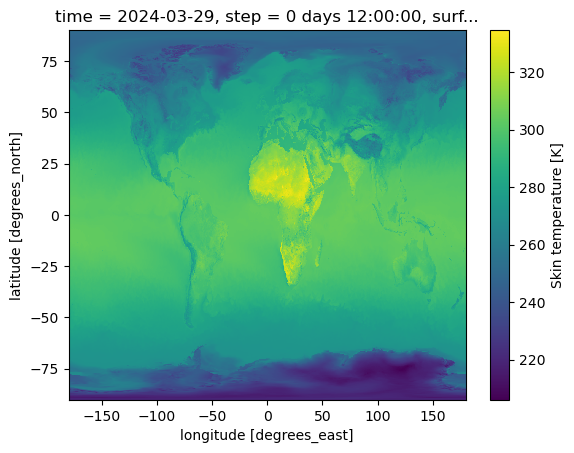

In [10]:
test.plot()

## Section 5

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
import ipywidgets as widgets
import pandas as pd
from IPython.display import display

from ecmwf.opendata import Client
import numpy as np
import ipyleaflet
from ipyleaflet import Map, Marker

import ipywidgets
import xarray as xr
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt

from bqplot import Lines, Figure, LinearScale, Axis, DateScale
import bqplot
from datetime import datetime

import utils_tracks as tracks
from utils_atm import *
# from utils_atm_orig import *
from utils_TemporalEvolution import *
# from utils_TemporalEvolution_orig import *

In [3]:
# Load the ECMWF forecast data
df_storms_forecast = tracks.create_storms_df(datetime(2023, 9, 7, 0, 0))

# Select the data of storm LEE (Storm Identifier: 13L)
df_storm_forecast = df_storms_forecast[df_storms_forecast.stormIdentifier == "13L"]

locations_avg, timesteps_avg, pressures_avg, wind_speeds_avg = tracks.mean_forecast_track(df_storm_forecast)

In [4]:
cyclone_days = 2 # in the original script this the number of the forecasted days of the cyclone 

#steps for the variable probability of having wind gusts > 25m/s at 10m
windprobsteps = [f"{12 * i}-{ 12 * i + 24}" for i in range(2*cyclone_days-1)]
windprobsteps.insert(0, "0-24")

# dictionary of the steps for the wind gust prob. with the key "10fgg25" and of the 
# steps for the other variables with the key "base"
stepsdict = {
               "base": list(np.arange(12, 240, 12)[0:2*cyclone_days]),
               "10fgg25": windprobsteps
            }
#list of variables to visualize in Section 5
variables = ['msl', 'skt', 'tp', '10fgg25'] 

In [5]:
start_date = datetime(2024, 4, 2, 0, 0)

#first cyclone position
initial_latlon = (38, -90)

# Steps to download 
steps_to_download = stepsdict['base']
steps_to_download2 = stepsdict['10fgg25']

# Initial date
initial_date = start_date.strftime("%Y%m%d")

# Average cyclone track
avg_track = locations_avg

In [6]:
fnames = dwnl_atmdata(variables, stepsdict, stdate = 0);

In [7]:
#più di un mese: non viene scaricato

In [8]:
### LOAD DATA
data_allpoints = get_allvars_allpoints(initial_date, stepsdict, variables)

# Change units of skin temperature  K to ºC
data_allpoints['skt']['Value'] = data_allpoints['skt']['Value'] - 273.15

# Change units of mean sea level pressure from Pa to hPa
data_allpoints['msl']['Value'] = data_allpoints['msl']['Value']/100    

In [16]:
data_allpoints['msl'].loc['12', 90, -180]

Lat                90.0
Lon              -180.0
Value       1015.828125
point    (90.0, -180.0)
Name: (12, 90.0, -180.0), dtype: object

In [17]:
data_allpoints['msl'].loc['12', :, :].min()

Lat                -90.0
Lon               -180.0
Value         950.548096
point    (-90.0, -180.0)
dtype: object

In [11]:
data_initial_plot = get_df_pos(data_allpoints, (40, 45), stepsdict['base'])

In [14]:
data_initial_plot['10fgg25'].y.to_numpy()

array([ 0.,  0.,  0., nan], dtype=float32)

In [58]:
tp = "data/atm/20240331/tp_20240331_time0_steps12-72_oper_fc.grib"
fgg25 = "data/atm/20240331/10fgg25_20240331_time0_steps0-24-48-72_enfo_ep.grib"

In [59]:
f = xr.open_dataset(fgg25)

In [43]:
f.step.values/(10**9*60*60)

array([12, 24, 36, 48, 60, 72], dtype='timedelta64[ns]')

In [48]:
df = f.isel(step = 0)['tp'].to_dataframe()

In [60]:
f.isel(step = 0).to_dataframe()

time   step  heightAboveGround valid_time  fg10g25
latitude longitude                                                         
 90.0    -180.00   2024-03-31 1 days               10.0 2024-04-01      0.0
         -179.75   2024-03-31 1 days               10.0 2024-04-01      0.0
         -179.50   2024-03-31 1 days               10.0 2024-04-01      0.0
         -179.25   2024-03-31 1 days               10.0 2024-04-01      0.0
         -179.00   2024-03-31 1 days               10.0 2024-04-01      0.0
...                       ...    ...                ...        ...      ...
-90.0     178.75   2024-03-31 1 days               10.0 2024-04-01      0.0
          179.00   2024-03-31 1 days               10.0 2024-04-01      0.0
          179.25   2024-03-31 1 days               10.0 2024-04-01      0.0
          179.50   2024-03-31 1 days               10.0 2024-04-01      0.0
          179.75   2024-03-31 1 days               10.0 2024-04-01      0.0

[1038240 rows x 5 columns]

In [56]:
f.isel(step = 0).to_dataframe()

time            step  surface          valid_time  \
latitude longitude                                                           
 90.0    -180.00   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
         -179.75   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
         -179.50   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
         -179.25   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
         -179.00   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
...                       ...             ...      ...                 ...   
-90.0     178.75   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
          179.00   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
          179.25   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
          179.50   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   
          179.75   2024-03-31 0 days 12:00:00      0.0 2024-03-31 12:00:00   

                          tp  
latitude longitude            
 90.0    -180.00    0.000214  
         -179.75    0.000214  
         -179.50    0.000214  
         -179.25    0.000214  
         -179.00    0.000214  
...                      ...  
-90.0     178.75    0.000061  
          179.00    0.000061  
          179.25    0.000061  
          179.50    0.000061  
          179.75    0.000061  

[1038240 rows x 5 columns]